## Pré processamento e machine learning

Antes de criar um modelo de machine learning, é necessário verificar se é possível implementar o código com os dados existentes. A ausência de dados ou dados fora do padrão podem influenciar negativamente na geração do valor alvo. Para que isso seja evitado, alguns passos serão realizados:

- Redução da dimensionalidade
- Separação em dados treino/teste - essencial para não causar data leakage
- Tratamento de Outliers
- Conversão de escala


#### Importando dados e bibliotecas

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split


In [2]:
musicas = pd.read_csv('data/data.csv')

In [3]:
# Verificando dataset
musicas.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
musicas.shape

(170653, 19)

In [5]:
musicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [6]:
# Eliminando colunas irrelevantes para análise
musicas.drop(columns=['artists','id','name','release_date'], inplace=True)

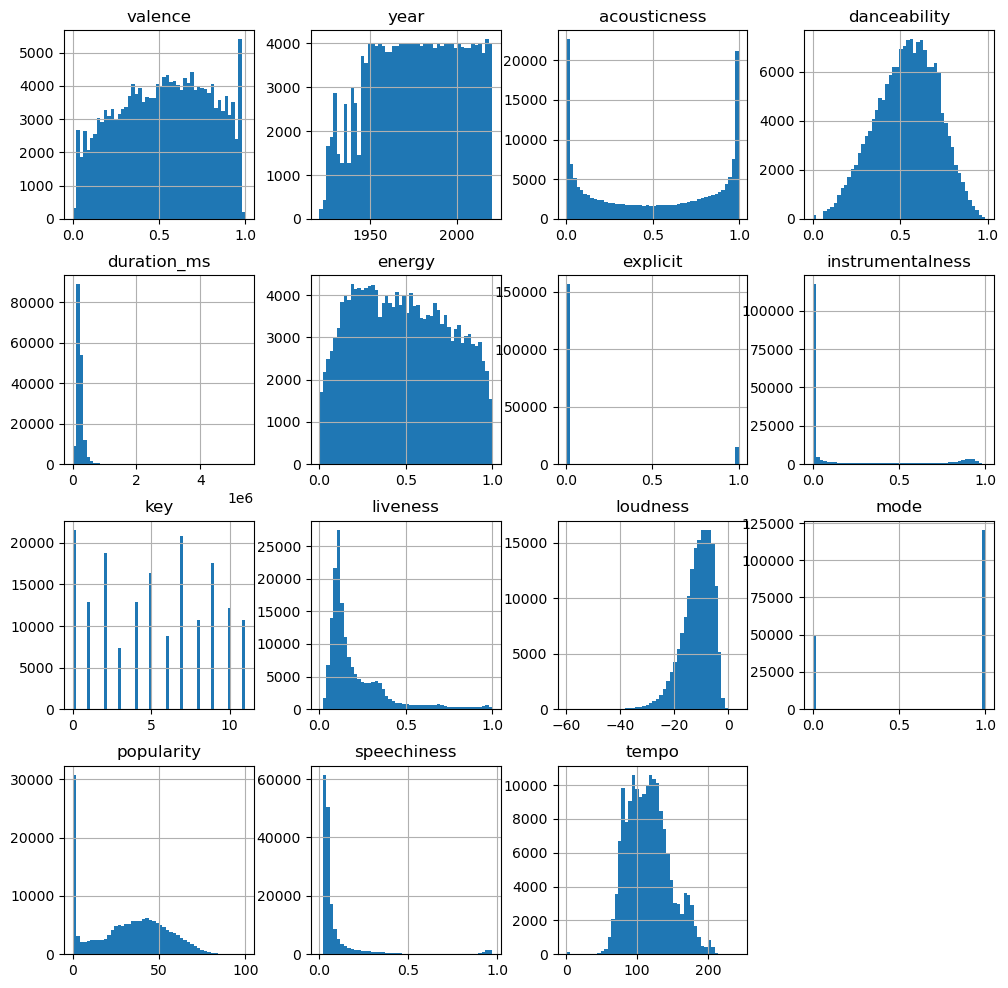

In [7]:
musicas.hist(bins=50, figsize=(12,12))
plt.show()

In [20]:
musicas = musicas[musicas.popularity != 0]

In [27]:
def plotvariable(df, variable):
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    df[variable].hist()

    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.show()

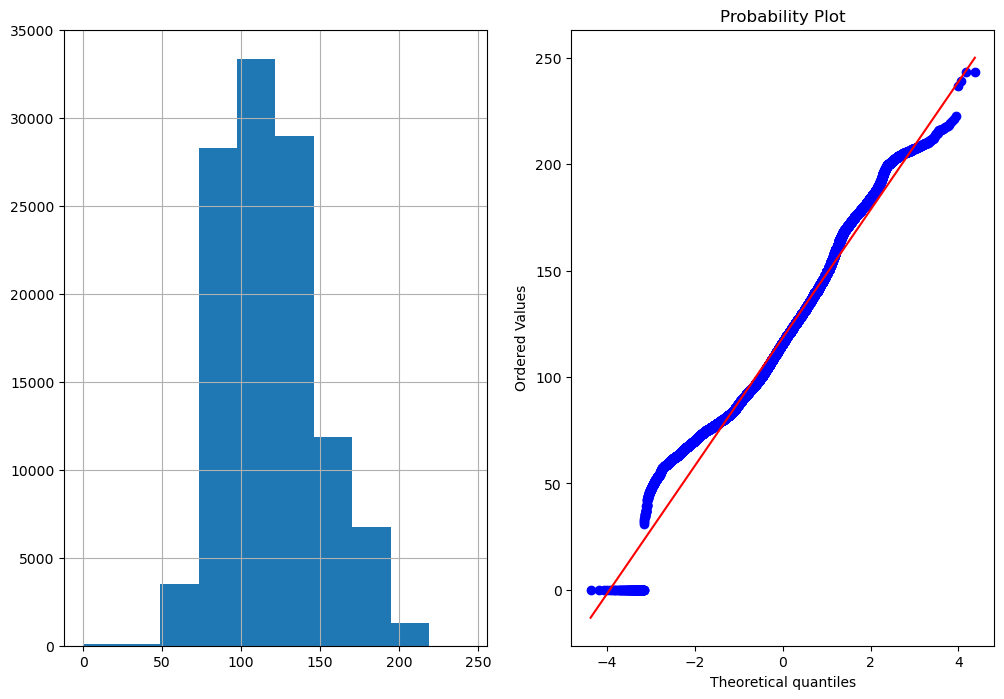

In [35]:
plotvariable(musicas, 'tempo')

In [36]:
#Box cox transformation
def boxcox_transf(data, variable):
    data[f'{variable}_boxcox'], lambdavalue = stats.boxcox(data[variable])
    plotvariable(data, f'{variable}_boxcox')
    return lambdavalue

In [ ]:
boxcox_transf(musicas, )

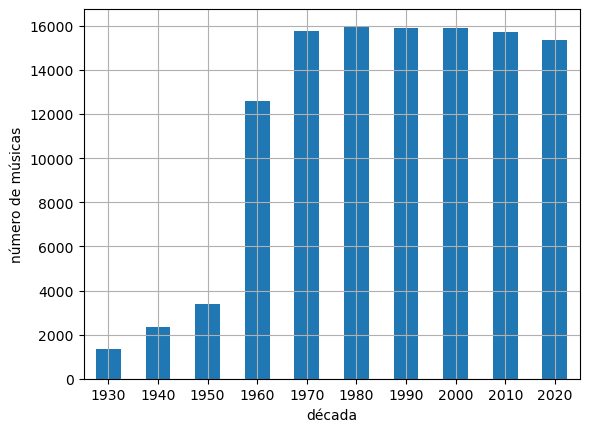

In [22]:
# Para evitar um dataset teste enviesado, iremos analisar o uso de estratificação na amostra com relação ao ano
year_labels = ['1930','1940','1950','1960','1970','1980','1990','2000','2010','2020']
musicas['década'] = pd.cut(musicas.year, bins=10, labels=year_labels)

musicas['década'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("década")
plt.ylabel("número de músicas")
plt.show()

#### Separando em dados de treino e teste

In [23]:
## Dados de teste não serão mexidos até o teste final do modelo

train_set, test_set = train_test_split(musicas, test_size=0.2, random_state=42)
strat_train_set, strat_test_set = train_test_split(musicas, test_size=0.2, random_state=42, stratify=musicas['década'])

In [24]:
def decada_proportion(data):
    return data["década"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall %": decada_proportion(musicas),
    "Stratified %": decada_proportion(strat_test_set),
    "Random %": decada_proportion(test_set),
}).sort_index()

compare_props.index.name = "Década"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Década,,,,,
1930,1.17,1.16,1.20,-0.08,2.55
1940,2.04,2.04,2.10,-0.09,3.14
1950,2.95,2.95,2.94,0.03,-0.27
1960,11.01,11.01,10.93,-0.01,-0.73
1970,13.80,13.80,13.84,0.00,0.29
1980,13.97,13.97,13.96,-0.00,-0.10
1990,13.94,13.94,14.22,-0.00,2.04
2000,13.91,13.91,13.80,0.00,-0.75
2010,13.78,13.78,13.89,0.00,0.80


Apesar de apresentar uma variação pequena entre a amostra estratificada e a aleatória, a estratificada representou melhor a população, portanto iremos utilizar a estratificada.

In [12]:
#Não precisamos mais da coluna 'década', portanto iremos removê-la
for set_ in (strat_train_set, strat_test_set):
    set_.drop('década', axis=1, inplace=True)

In [13]:
musicas = strat_train_set.copy()

In [14]:
#Buscando por correlações
corr_matrix = musicas.corr()

In [15]:
corr_matrix['popularity'].sort_values(ascending=False)

popularity          1.000000
year                0.862711
energy              0.484129
loudness            0.457107
danceability        0.198652
explicit            0.189491
tempo               0.134371
duration_ms         0.057723
valence             0.012338
key                 0.006216
mode               -0.027549
liveness           -0.076199
speechiness        -0.173787
instrumentalness   -0.296488
acousticness       -0.572773
Name: popularity, dtype: float64

#### Separando as variáveis dependente e independentes

In [16]:
musicas_features = strat_train_set.drop('popularity', axis=1) #features
musicas_target = strat_train_set['popularity'].copy() #target

#### Limpeza de dados

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

imputer.fit_transform(musicas_features)

array([[6.56000e-01, 1.94200e+03, 9.86000e-01, ..., 1.00000e+00,
        3.64000e-02, 1.48845e+02],
       [2.91000e-01, 1.95500e+03, 9.35000e-01, ..., 0.00000e+00,
        4.91000e-02, 1.11936e+02],
       [1.90000e-01, 1.97100e+03, 3.79000e-01, ..., 1.00000e+00,
        4.56000e-02, 1.19788e+02],
       ...,
       [8.51000e-01, 1.96300e+03, 1.58000e-01, ..., 1.00000e+00,
        4.31000e-02, 1.61876e+02],
       [7.65000e-01, 2.00700e+03, 7.08000e-04, ..., 1.00000e+00,
        1.27000e-01, 1.91933e+02],
       [1.50000e-01, 2.00900e+03, 7.16000e-01, ..., 1.00000e+00,
        2.90000e-02, 1.17995e+02]])

#### Mudança de escala

In [18]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
musicas_rob_scaled = rob_scaler.fit_transform(musicas_features)